In [2]:
# Import Required Libraries
from pathlib import Path
import matplotlib.image as mpimg
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from skimage import color

In [3]:
# Image directories
train_dir = "images/training/"
test_dir = "images/test/"

In [4]:
def load_dataset(img_dir):
    p = Path(img_dir)
    dirs = p.glob('*')

    images = []
    labels = []

    for dir in dirs:
        label = str(dir).split('\\')[-1]
        for file in dir.glob('*.jpg'):
            img = mpimg.imread(file)

            if img is not None:
                images.append(img)
                labels.append(label)
    
    return images, labels  # Mengembalikan dua list terpisah


In [5]:
train_images, train_labels = load_dataset(train_dir)
test_images, test_labels = load_dataset(test_dir)

In [6]:
print(f"Jumlah gambar training: {len(train_images)}")
print(f"Jumlah gambar test: {len(test_images)}")

Jumlah gambar training: 240
Jumlah gambar test: 160


In [7]:
import numpy as np
def extract_histogram_features(images, bins=(8, 8, 8)):
    histogram_features = []
    for img in images:
        # Periksa apakah gambar sudah dalam format warna BGR (3 dimensi)
        if img.ndim == 3:
            # Konversi gambar ke format HSV
            hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
        else:
            # Jika gambar tidak berwarna, konversi ke 3 channel dengan copy
            hsv = cv2.cvtColor(cv2.merge([img, img, img]), cv2.COLOR_RGB2HSV)
        
        # Ekstraksi histogram dalam ruang warna HSV
        hist = cv2.calcHist([hsv], [0, 1, 2], None, bins, [0, 180, 0, 256, 0, 256])
        # Normalisasi histogram
        cv2.normalize(hist, hist)
        # Flatten histogram menjadi array 1D
        histogram_features.append(hist.flatten())
    
    return np.array(histogram_features)

In [8]:
# Ekstraksi fitur
train_features = extract_histogram_features(train_images)
test_features = extract_histogram_features(test_images)

print(f"Fitur training shape: {train_features.shape}")
print(f"Fitur test shape: {test_features.shape}")


Fitur training shape: (240, 64)
Fitur test shape: (160, 64)


In [9]:
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_labels)
y_test = label_encoder.transform(test_labels)

In [10]:
# Standarisasi fitur histogram
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
test_features = scaler.transform(test_features)

In [11]:
# Membagi data train ke dalam set train dan validation
X_train, X_val, y_train, y_val = train_test_split(train_features, train_labels, test_size=0.2, random_state=42)


In [12]:
# Membuat model SVM
svm_model = SVC(kernel='linear')

# Melatih model dengan data train
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [13]:
# Evaluasi model pada data validasi
y_val_pred = svm_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f'Akurasi Validasi: {val_accuracy * 100:.2f}%')

# Evaluasi model pada data test
y_test_pred = svm_model.predict(test_features)
test_accuracy = accuracy_score(test_labels, y_test_pred)
print(f'Akurasi Test: {test_accuracy * 100:.2f}%')

Akurasi Validasi: 100.00%
Akurasi Test: 91.88%


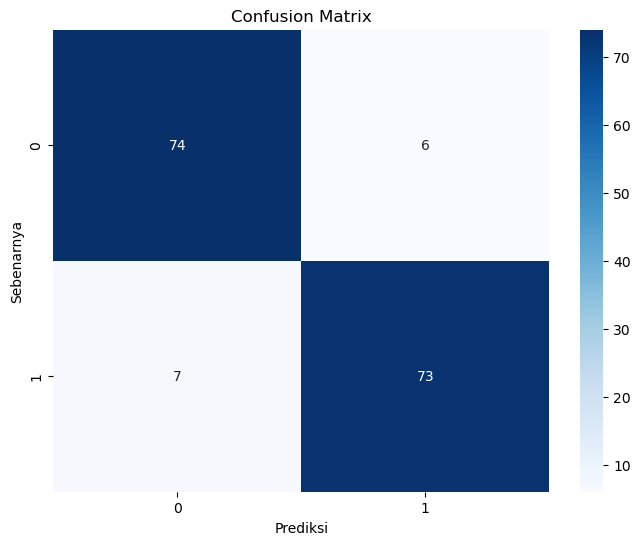

Classification Report:
              precision    recall  f1-score   support

         day       0.91      0.93      0.92        80
       night       0.92      0.91      0.92        80

    accuracy                           0.92       160
   macro avg       0.92      0.92      0.92       160
weighted avg       0.92      0.92      0.92       160



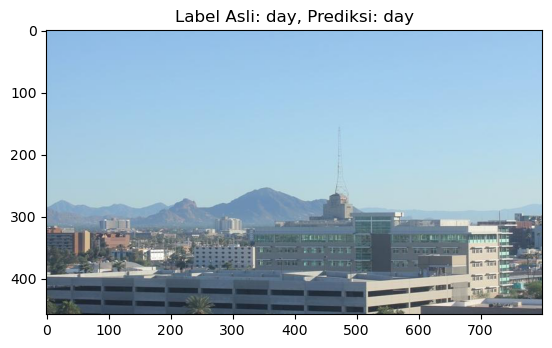

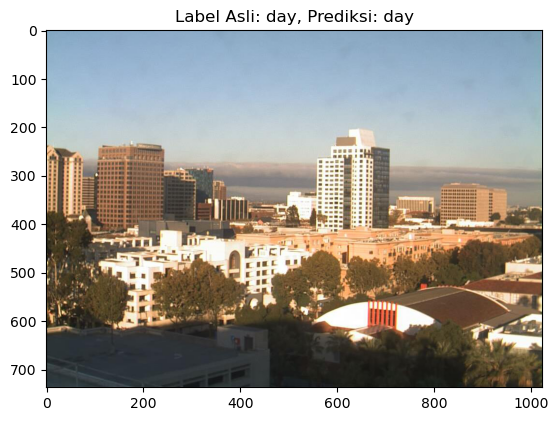

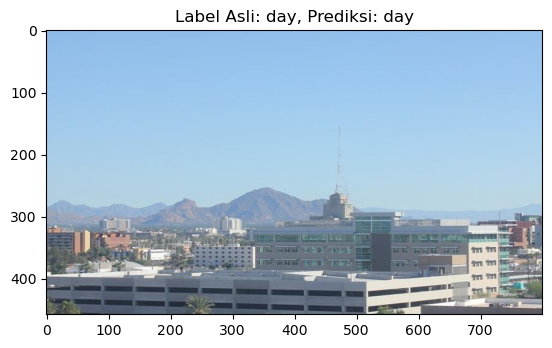

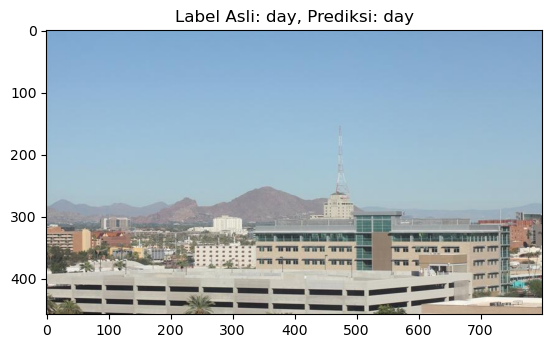

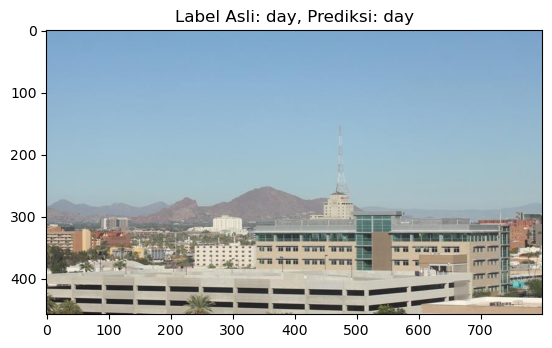

In [14]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Menampilkan Confusion Matrix
cm = confusion_matrix(test_labels, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Prediksi')
plt.ylabel('Sebenarnya')
plt.show()

# 2. Menampilkan Classification Report
print("Classification Report:")
print(classification_report(test_labels, y_test_pred))

# 3. Contoh Prediksi (Menampilkan beberapa gambar dan label prediksi)
for i in range(5):
    plt.imshow(test_images[i])
    plt.title(f'Label Asli: {test_labels[i]}, Prediksi: {y_test_pred[i]}')
    plt.show()


Ada 13 prediksi yang salah.


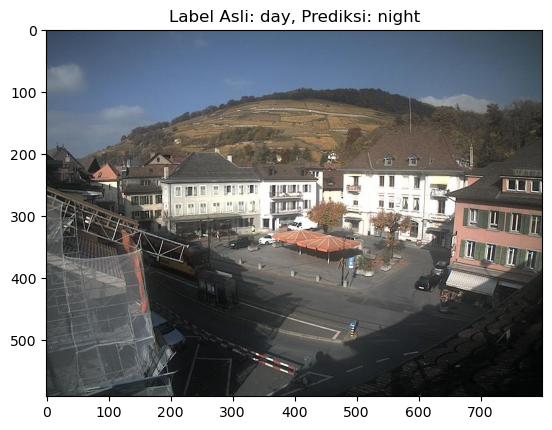

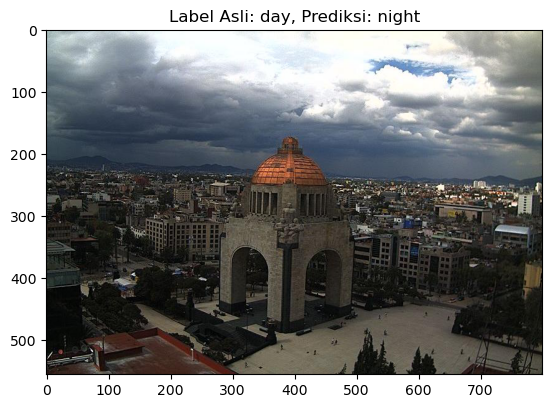

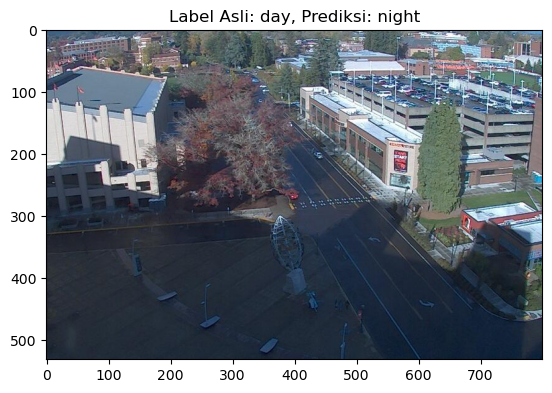

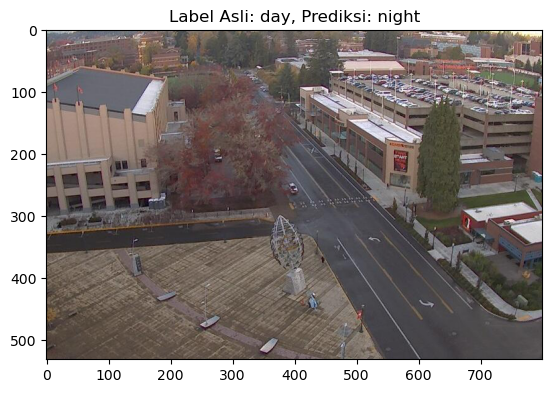

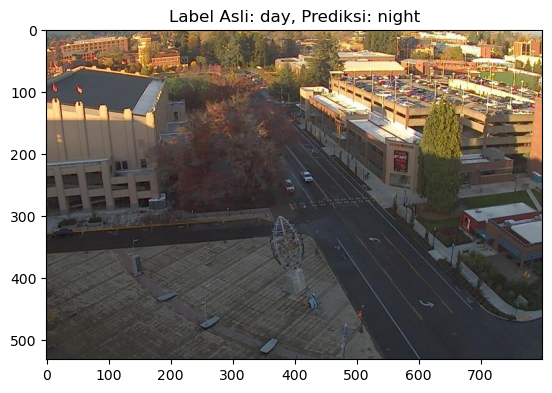

In [15]:
# Menampilkan Contoh Prediksi yang Salah
wrong_predictions = []

for i in range(len(test_labels)):
    if test_labels[i] != y_test_pred[i]:
        wrong_predictions.append((test_images[i], test_labels[i], y_test_pred[i]))

# Menampilkan beberapa contoh prediksi yang salah
if wrong_predictions:
    print(f'Ada {len(wrong_predictions)} prediksi yang salah.')
    for i, (img, true_label, pred_label) in enumerate(wrong_predictions[:5]):  # Menampilkan hingga 5 kesalahan pertama
        plt.imshow(img)
        plt.title(f'Label Asli: {true_label}, Prediksi: {pred_label}')
        plt.show()
else:
    print("Tidak ada prediksi yang salah.")
